# Exploratory Data Analysis

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("./wether_data_trimmed_helsinki_kumpula.csv")
df = df.drop(["Unnamed: 0"], axis=1)
print(df)

print("-"*70)

slip = pd.read_csv("./slip_warnings_preprocessed.csv")
print(slip)

print("*"*70)

df2 = df.merge(slip)
print(df2)

             date  rainfall_mm  snow_depth_cm  air_temp  max_temp  min_temp  \
0      2013-11-24         -1.0           -1.0       0.7       4.4      -1.4   
1      2013-11-25          0.0           -1.0      -1.7       0.0      -2.8   
2      2013-11-26          1.0           -1.0      -2.0       2.8      -6.6   
3      2013-11-27         -1.0           -1.0       4.4       5.4       2.8   
4      2013-11-28          0.0           -1.0       3.5       6.3       1.4   
...           ...          ...            ...       ...       ...       ...   
27888  2022-09-21         -1.0           -1.0       8.2       9.9       7.0   
27889  2022-09-21         -1.0           -1.0       8.2       9.9       7.0   
27890  2022-09-22         -1.0           -1.0       7.0      11.4       1.9   
27891  2022-09-22         -1.0           -1.0       7.0      11.4       1.9   
27892  2022-09-22         -1.0           -1.0       7.0      11.4       1.9   

       min_ground_temp  
0                  0.0  
1

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

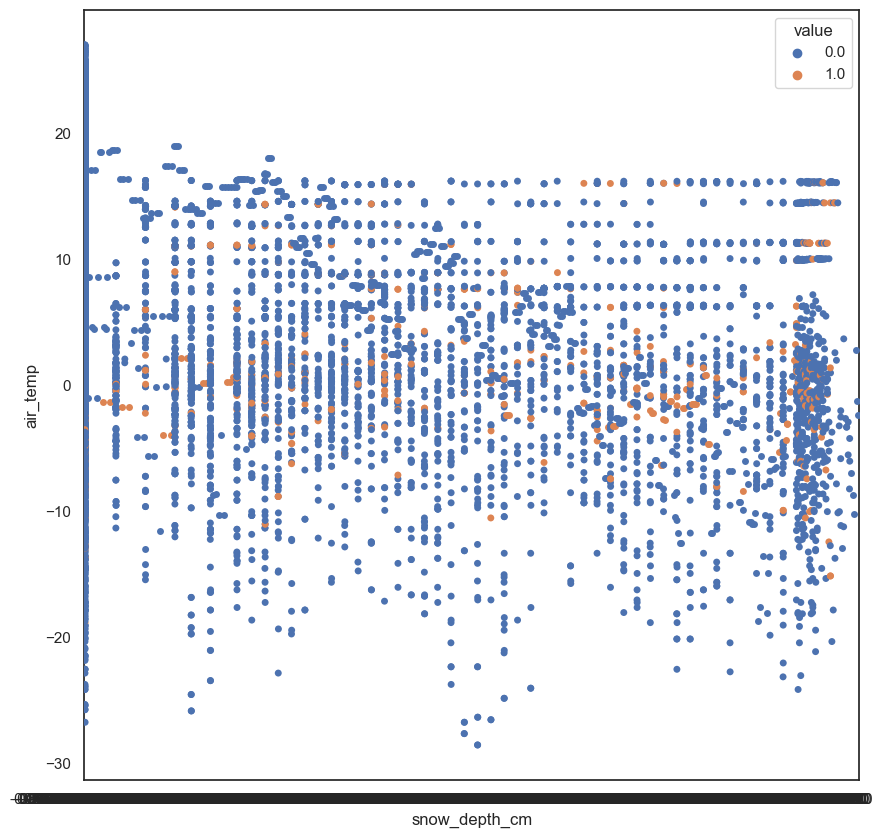

In [23]:
sns.set(style="white", color_codes=True)
sns.stripplot(data=df2, x="snow_depth_cm", y="air_temp", hue="value", jitter=True)
sns.despine

In [7]:
df3 = df2
df3["date"] = pd.to_datetime(df3["date"])
print(df3["date"].dtype)
df3["year"] = df3["date"].dt.year
print(df3)

print("_"*70)

year = df3#.where(df3["year"] == 2020, np.nan)
year = year.dropna()
print(year)

datetime64[ns]
            date  rainfall_mm  snow_depth_cm   air_temp   max_temp   min_temp  \
0     2013-11-24     -1.00000           -1.0   0.700000   4.400000  -1.400000   
1     2013-11-24     -0.99982           -1.0  -0.700000   0.600000  -4.000000   
2     2013-11-24      0.10000           -1.0  -1.600000   0.300000  -4.900000   
3     2013-11-24      1.90000            2.0   5.301928   9.802190   1.501422   
4     2013-11-25      0.00000           -1.0  -1.700000   0.000000  -2.800000   
...          ...          ...            ...        ...        ...        ...   
27932 2022-09-22     -1.00000           -1.0  17.096144  23.195621  10.197157   
27933 2022-09-22     -1.00000           -1.0  17.098072  23.197810  10.198578   
27934 2022-09-22     -1.00000           -1.0   7.000000  11.400000   1.900000   
27935 2022-09-22     -1.00000           -1.0   7.000000  11.400000   1.900000   
27936 2022-09-22     -1.00000           -1.0   7.000000  11.400000   1.900000   

       min_g

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

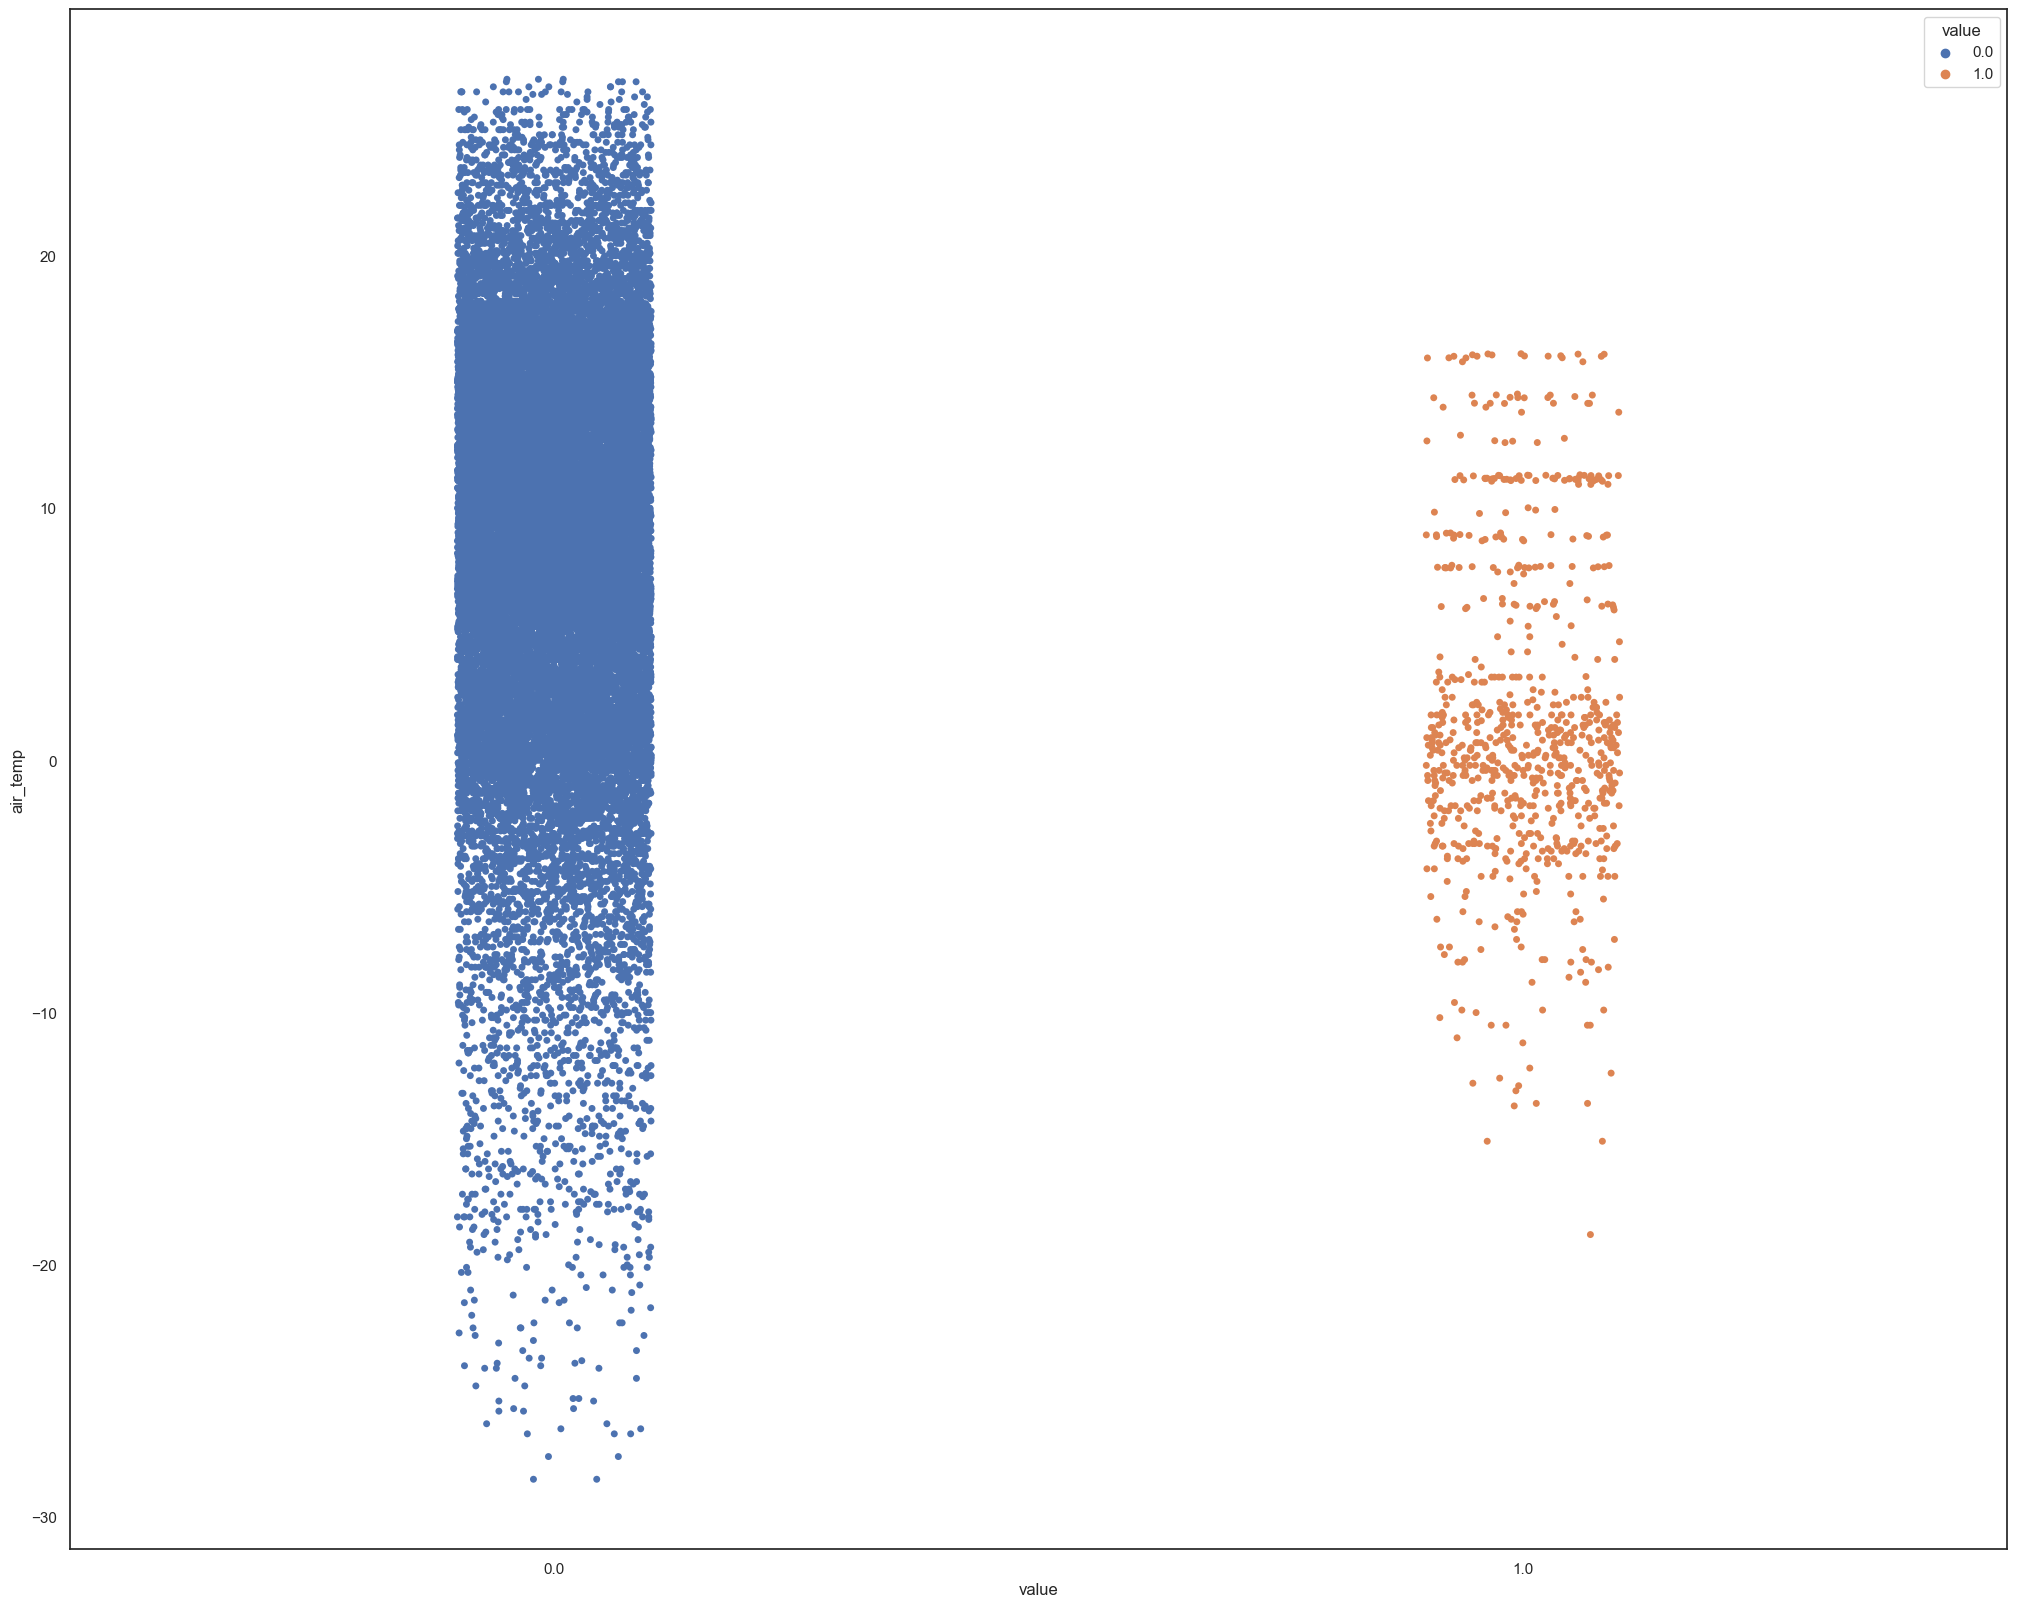

In [17]:
sns.set(style="white", color_codes=True)
sns.stripplot(data=year, x="value", y="air_temp", hue="value", jitter=True)
sns.despine

            date  rainfall_mm  snow_depth_cm   air_temp   max_temp   min_temp  \
152   2014-01-01      0.30000           -1.0   3.200000   5.000000   1.800000   
153   2014-01-01     -0.99299           -1.0   0.600000   0.900000   0.100000   
154   2014-01-01      1.30000           -1.0   2.600000   3.400000   1.800000   
155   2014-01-01      0.00000           -1.0   5.375196   9.885392   1.555441   
156   2014-01-02     -1.00000           -1.0   0.800000   1.900000   0.300000   
...          ...          ...            ...        ...        ...        ...   
25062 2021-12-31      0.30000            9.0   0.000000   2.200000  -1.900000   
25063 2021-12-31     -0.00335           -1.0  -7.300000  -2.200000 -13.400000   
25064 2021-12-31     -1.00000           33.0  -3.100000  -0.500000  -4.900000   
25065 2021-12-31     -1.00000           28.0  15.991340  21.941013   9.382598   
25066 2021-12-31     -1.00000           14.0  -1.400000   0.700000  -4.000000   

       min_ground_temp  val

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

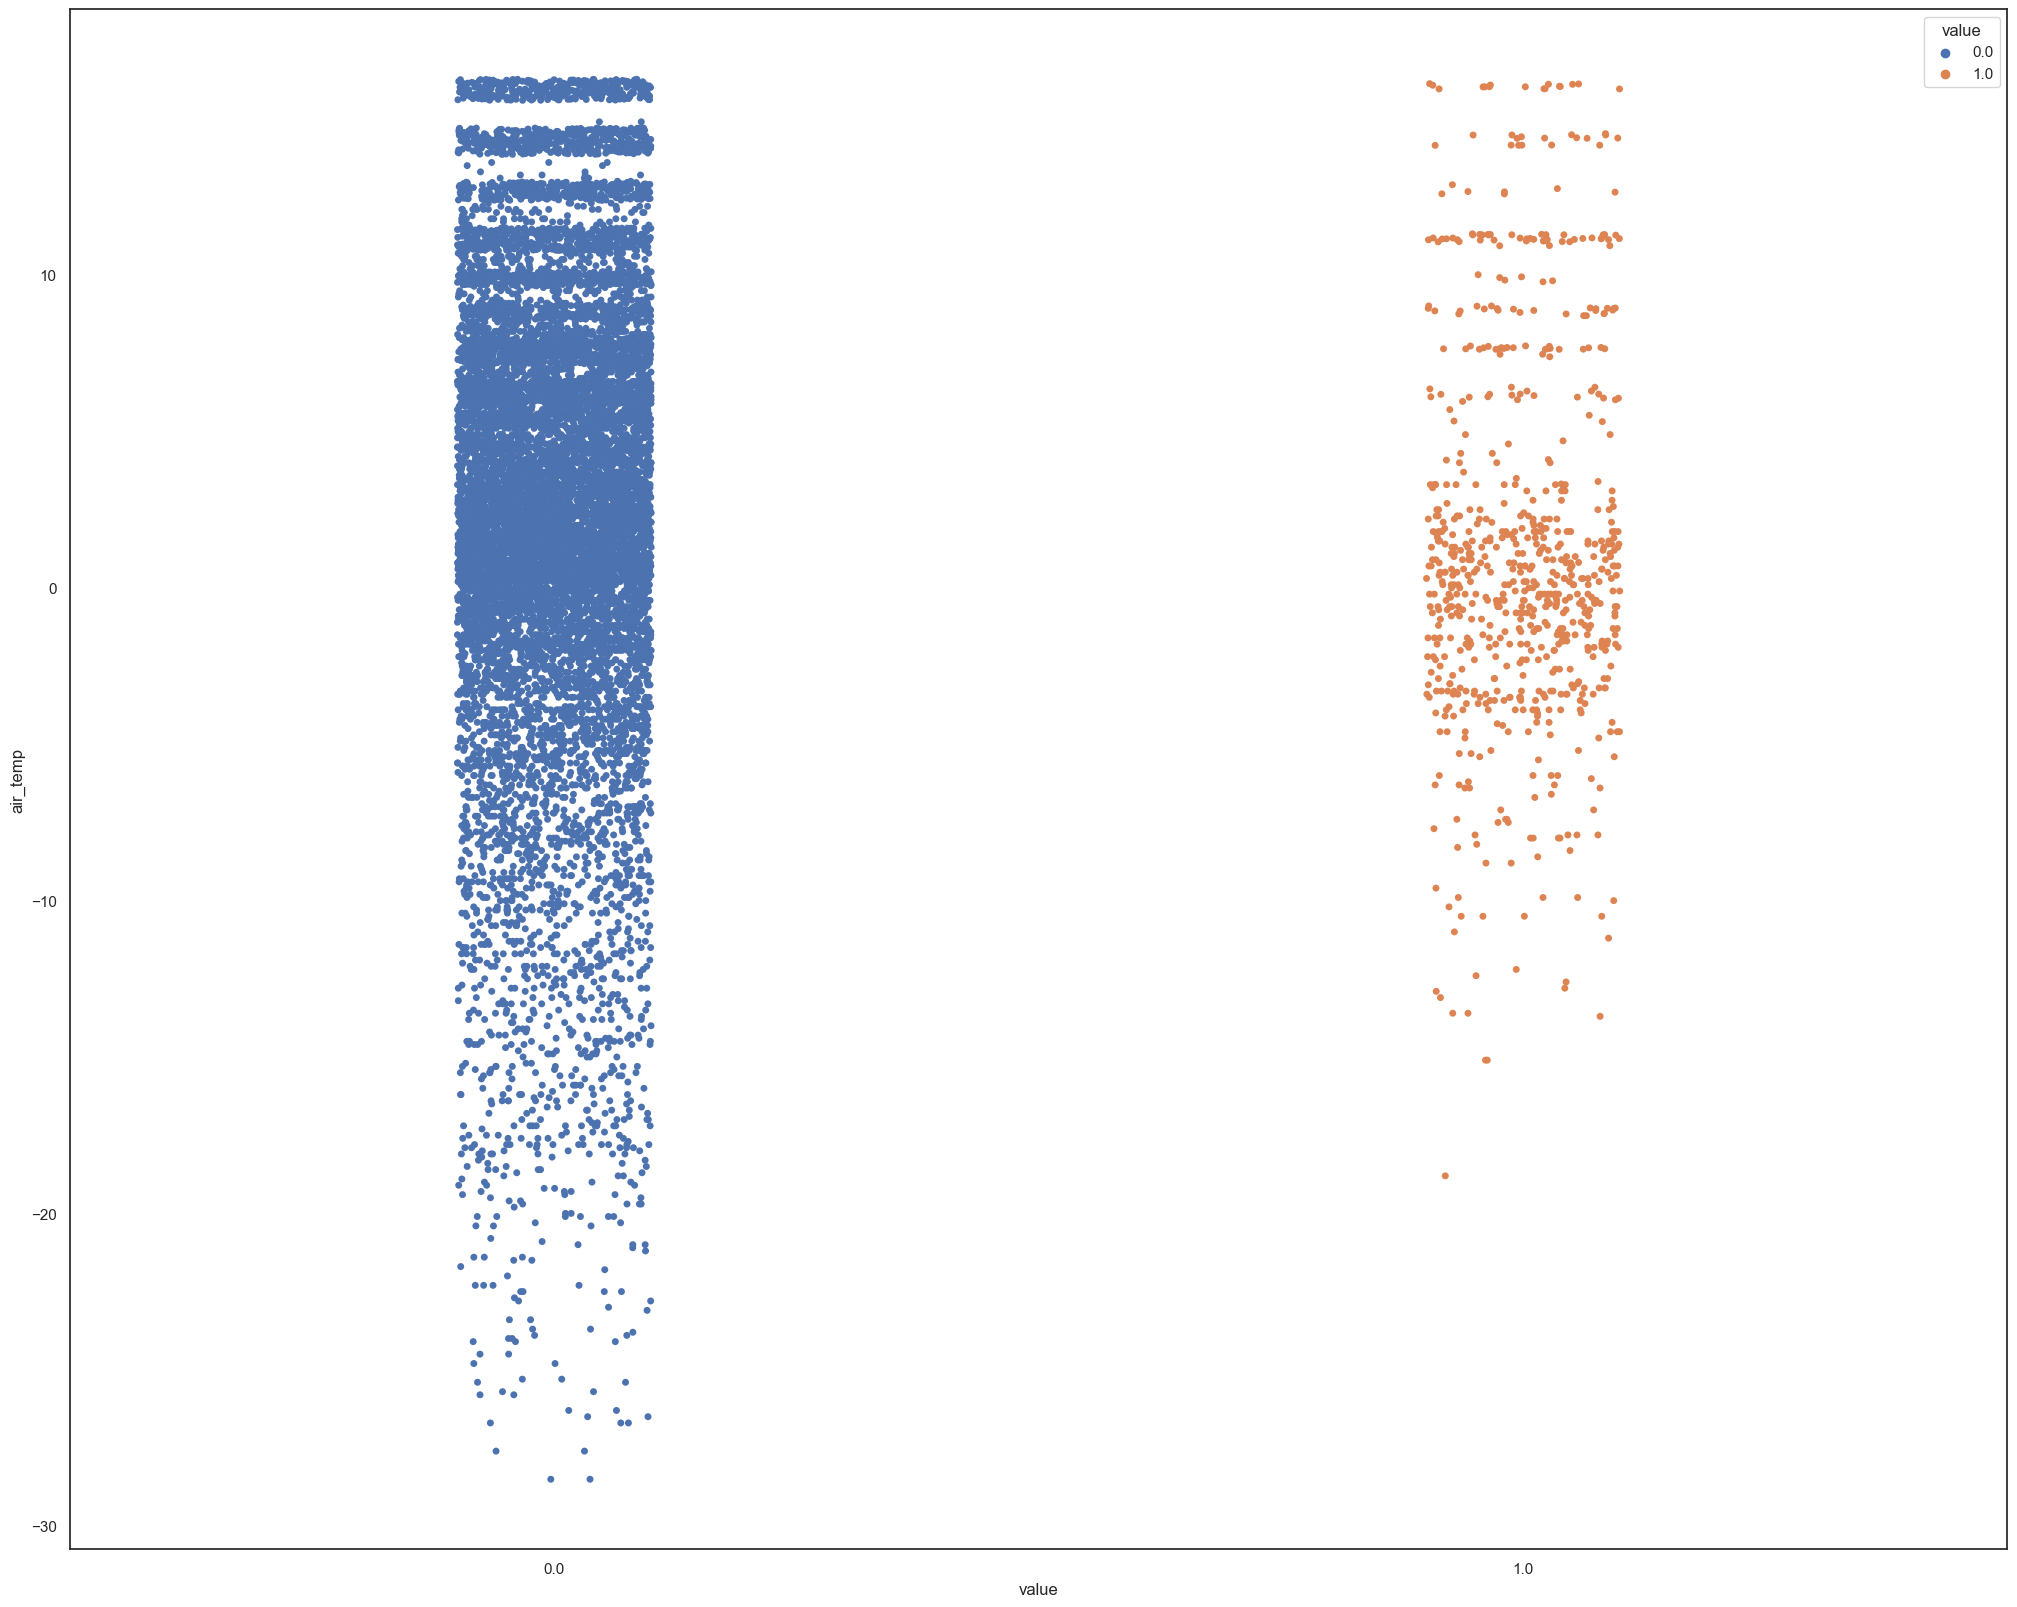

In [16]:
winter = df3
winter["month"] = winter["date"].dt.month
winter1 = winter.where(winter["month"] <= 4, np.nan)
winter2 = winter.where(winter["month"] >= 10, np.nan)
winter = pd.concat([winter1.dropna(), winter2.dropna()])
print(winter)

sns.set(style="white", color_codes=True)
sns.stripplot(data=winter, x="value", y="air_temp", hue="value", jitter=True)
sns.despine

<AxesSubplot: xlabel='value', ylabel='month'>

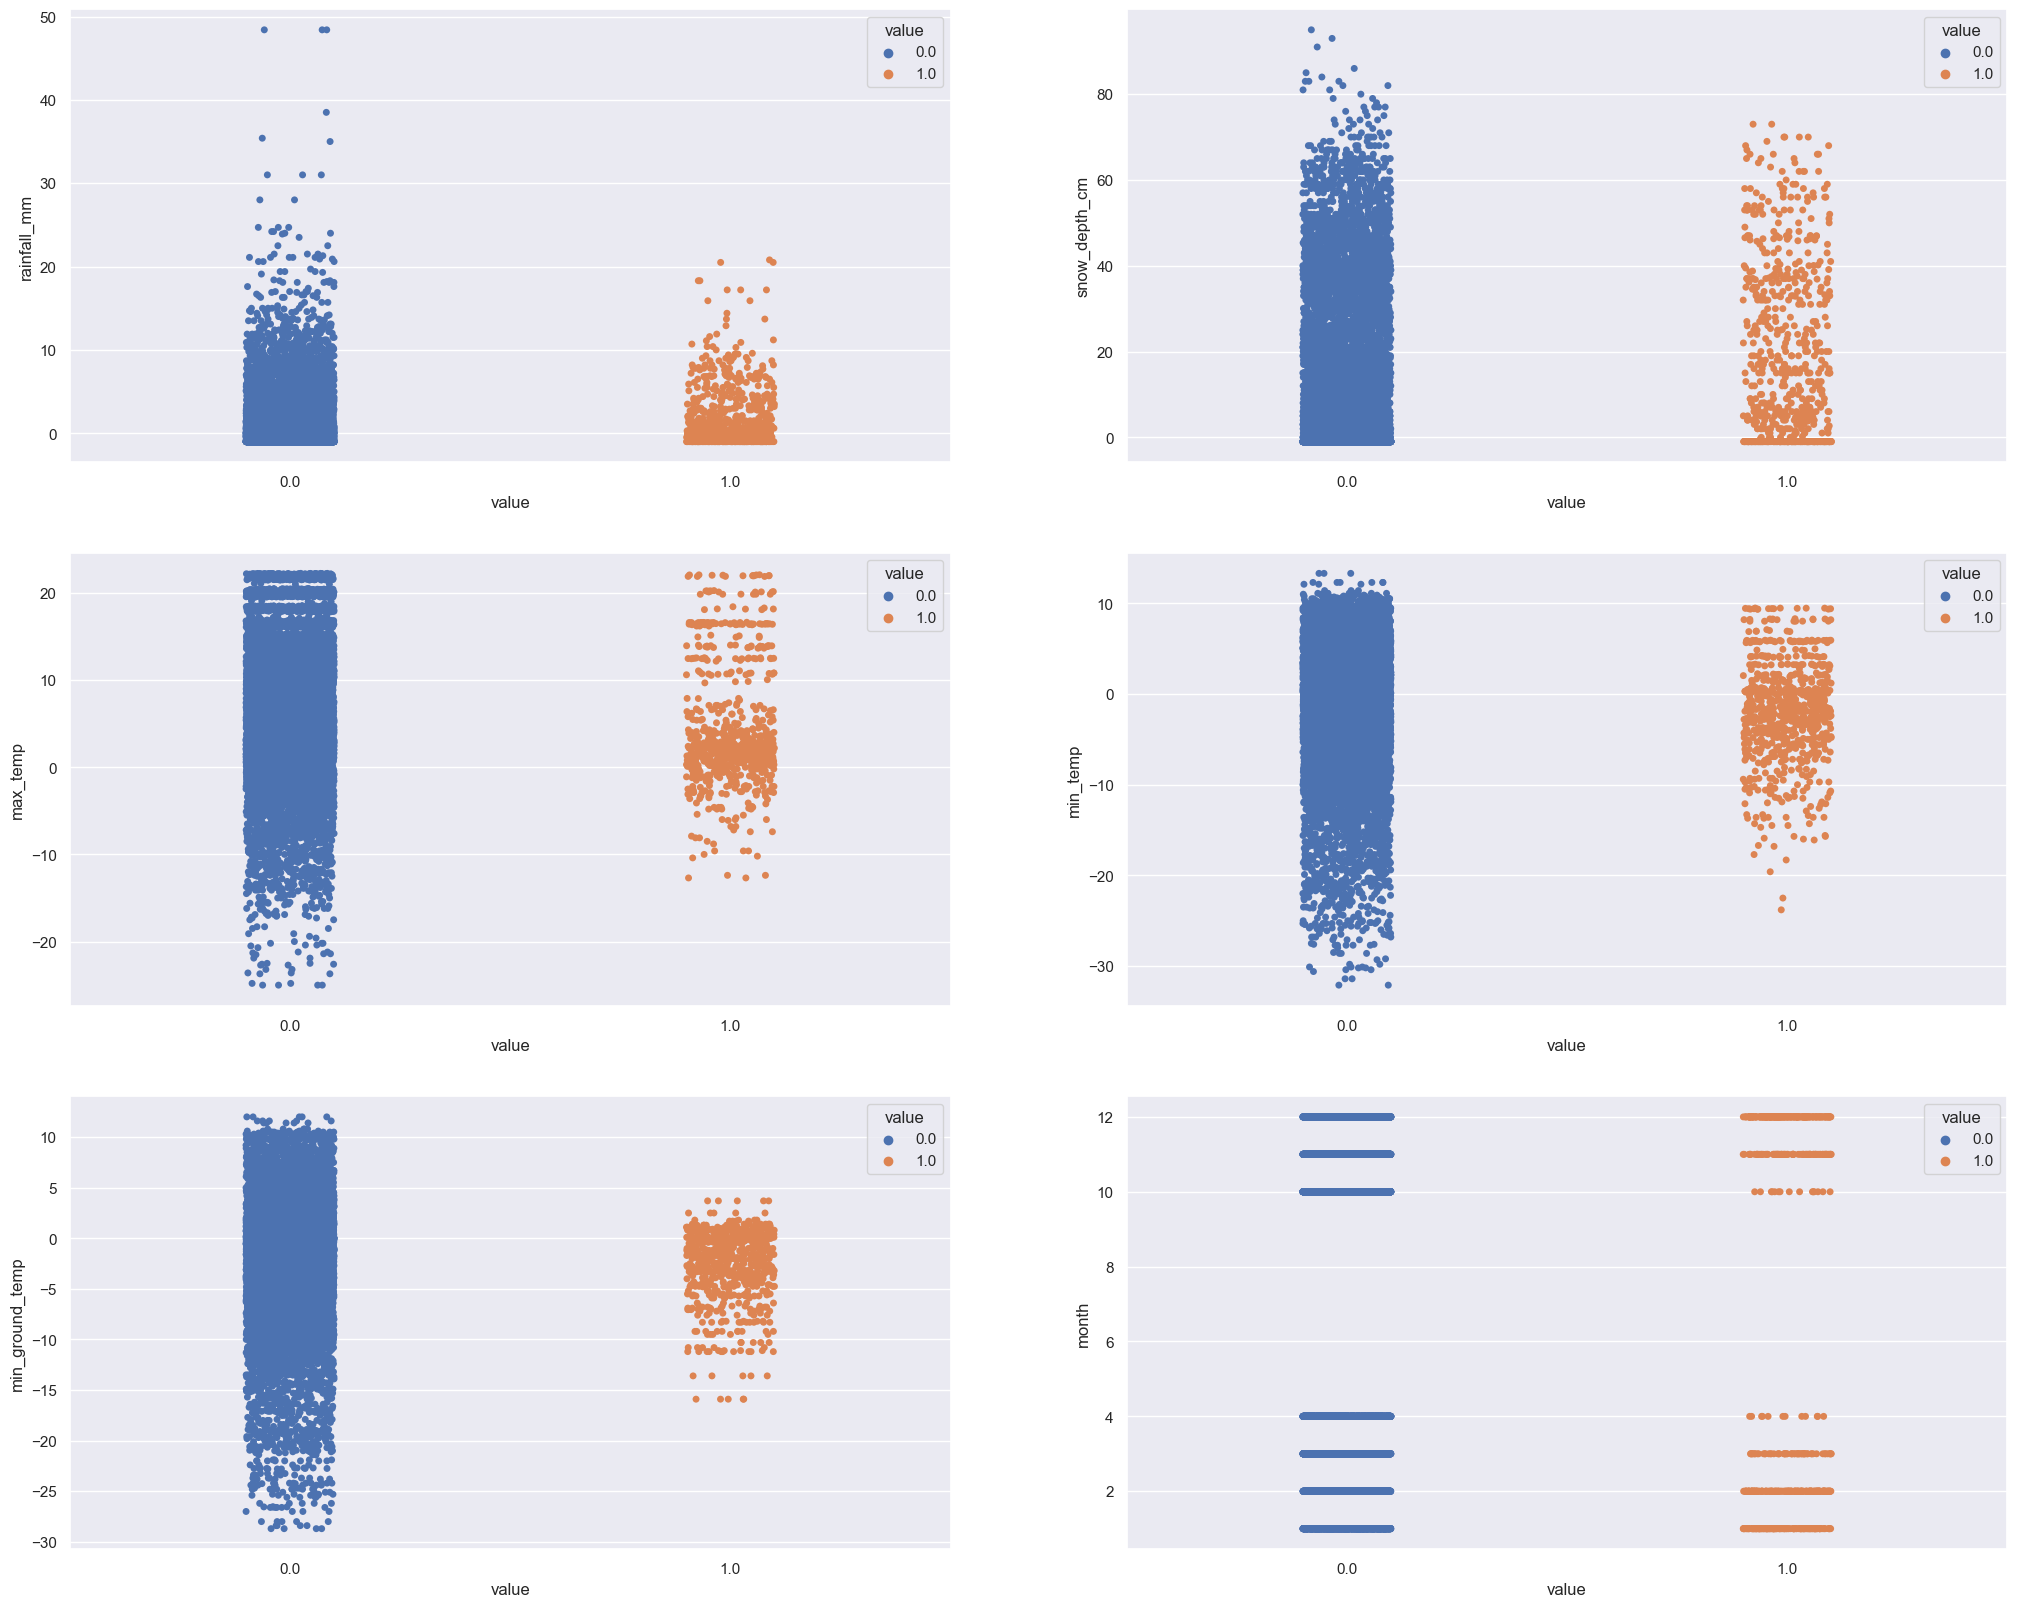

In [15]:
fig, axes = plt.subplots(3, 2)
sns.set(rc={"figure.figsize":(25, 20)})
sns.stripplot(data=winter, x="value", y="rainfall_mm", hue="value", jitter=True, ax=axes[0,0])
sns.stripplot(data=winter, x="value", y="snow_depth_cm", hue="value", jitter=True, ax=axes[0,1])
sns.stripplot(data=winter, x="value", y="max_temp", hue="value", jitter=True, ax=axes[1,0])
sns.stripplot(data=winter, x="value", y="min_temp", hue="value", jitter=True, ax=axes[1,1])
sns.stripplot(data=winter, x="value", y="min_ground_temp", hue="value", jitter=True, ax=axes[2,0])
sns.stripplot(data=winter, x="value", y="month", hue="value", jitter=True, ax=axes[2,1])

<AxesSubplot: xlabel='month', ylabel='snow_depth_cm'>

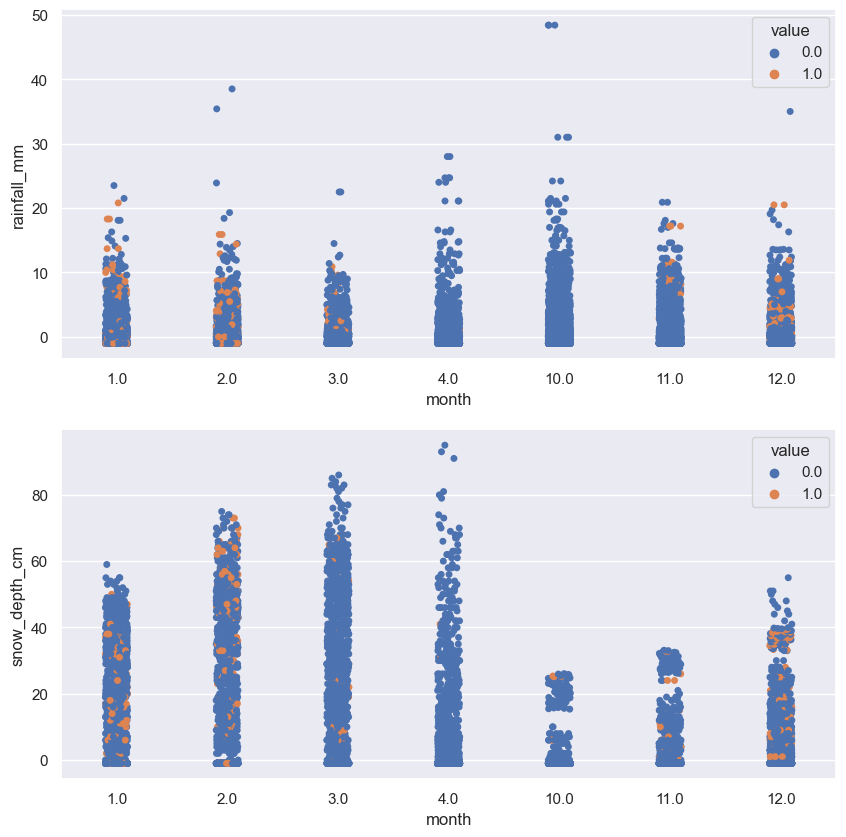

In [32]:
fig, axes = plt.subplots(2, 1)
sns.set(rc={"figure.figsize":(10, 10)})
sns.stripplot(data=winter, x="month", y="rainfall_mm", hue="value", jitter=True, ax=axes[0])
sns.stripplot(data=winter, x="month", y="snow_depth_cm", hue="value", jitter=True, ax=axes[1])

<AxesSubplot: xlabel='min_ground_temp', ylabel='min_temp'>

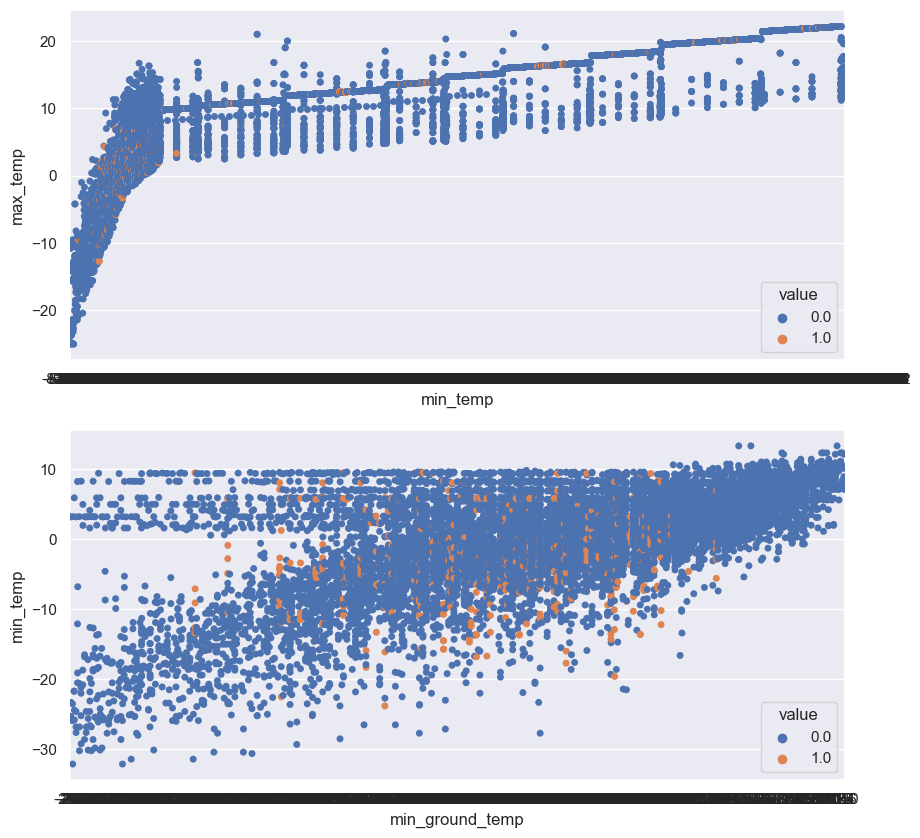

In [25]:
fig, axes = plt.subplots(2, 1)
sns.set(rc={"figure.figsize":(10, 10)})
sns.stripplot(data=winter, x="min_temp", y="max_temp", hue="value", jitter=True, ax=axes[0])
sns.stripplot(data=winter, x="min_ground_temp", y="min_temp", hue="value", jitter=True, ax=axes[1])

<AxesSubplot: xlabel='month', ylabel='max_temp'>

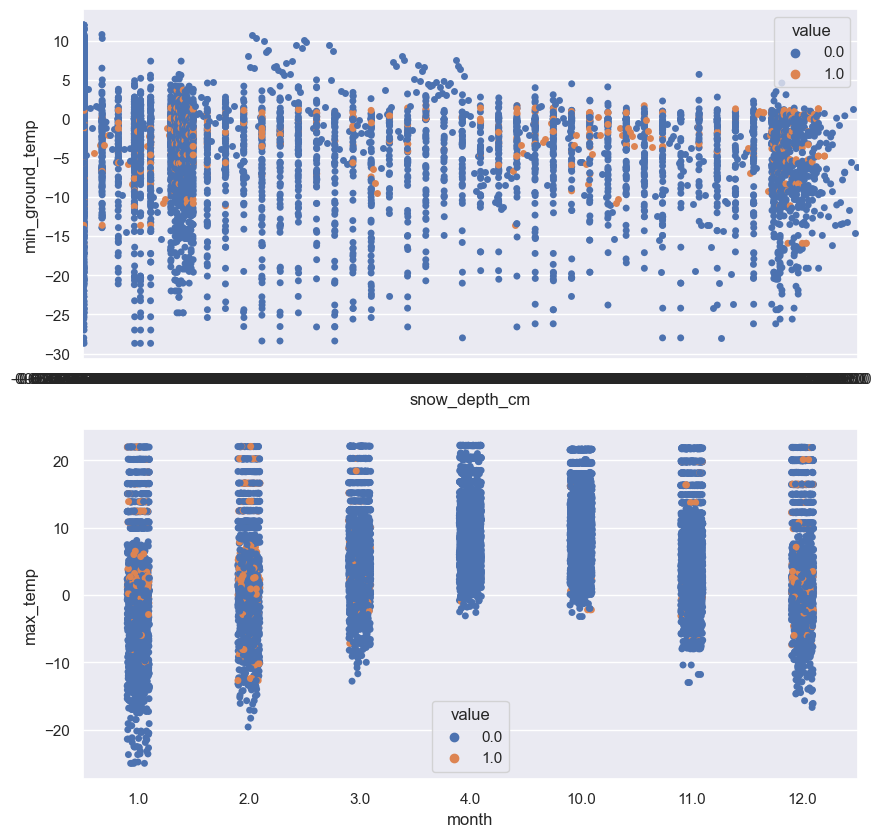

In [27]:
fig, axes = plt.subplots(2, 1)
sns.set(rc={"figure.figsize":(10, 10)})
sns.stripplot(data=winter, x="snow_depth_cm", y="min_ground_temp", hue="value", jitter=True, ax=axes[0])
sns.stripplot(data=winter, y="max_temp", x="month", hue="value", jitter=True, ax=axes[1])